In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("CC GENERAL.csv")
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [3]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [4]:
dataframe.fillna(dataframe.median(), inplace=True)

missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [5]:
from sklearn.preprocessing import Normalizer

In [6]:
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

## Coeficiente de Silhouette [-1, 1]

$\LARGE s=\dfrac{\beta-\alpha}{max(\alpha,\beta)}$

$\alpha$ = distância média entre o ponto e todos os outros pontos do <u>mesmo cluster</u>. <br>
$\beta$ = distância média entre o ponto e todos os outros pontos do cluster <u>mais próximo</u>.

## Distância Euclidiana

$\LARGE\displaystyle d(A,B)=\sqrt{(X_{B}-X_{A})^2+(Y_{B}-Y_{A})^2}$

In [9]:
from sklearn import metrics

In [10]:
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3646017628085195


# Índice Davies-Bouldin

$\Huge\displaystyle DB=\dfrac{1}{k}\sum_{i=1}^k max _{i\neq j} R_{ij}$

$\Huge\displaystyle R_{ij}=\frac{s_{i} + s_{j}}{d_{ij}}$ <br>

$\rightarrow$ medida de similaridade entre dois clusters $i$ e $j$ <br>
$s =$ distância média entre cada ponto do cluster e seu <b>centróide</b>. <br><br>
$s =$ similaridade dentro do cluster (compactação) <br>
$d =$ similaridade entre clusters (separação)

$\Huge S_{0}$

$\Large\begin{array}{ccc}
& x & y \\
A & 1,0 & 0,9 \\
B & 1,0 & 1,7 \\
C & 1,3 & 1,5 \\
ct & 1,1 & 1,3
\end{array}$

## Distância Euclidiana
$\Large d(A, ct) = \sqrt{(X_{ct} - X_{A})^2 + (Y_{ct} - Y_{A})^2}$

$\Large d(A, ct) = \sqrt{(1,1 - 1,0)^2 + (1,3 - 0,9)^2}$

$\Large d(A, ct) = \sqrt{0,17}$

$\Large d(A, ct) = 0,41$

-------------------------------------------------------------------

$\Large d(B, ct) = \sqrt{(X_{ct} - X_{B})^2 + (Y_{ct} - Y_{B})^2}$

$\Large d(B, ct) = \sqrt{(1,1 - 1,0)^2 + (1,3 - 1,7)^2}$

$\Large d(B, ct) = \sqrt{0,17}$

$\Large d(B, ct) = 0,41$

-------------------------------------------------------------------


$\Large d(C, ct) = \sqrt{(X_{ct} - X_{C})^2 + (Y_{ct} - Y_{C})^2}$

$\Large d(C, ct) = \sqrt{(1,1 - 1,3)^2 + (1,3 - 1,5)^2}$

$\Large d(C, ct) = \sqrt{0,08}$

$\Large d(C, ct) = 0,28$

-------------------------------------------------------------------


$\Large d(A, ct) = 0,41$

$\Large d(B, ct) = 0,41$

$\Large d(C, ct) = 0,28$

$\Large S_{0} = 0,36$


$\Huge S_{1}$

$\Large\begin{array}{ccc}
& x & y \\
D & 1,3 & 3,9 \\
E & 1,5 & 4,3 \\
F & 1,6 & 3,7 \\
ct & 1,4 & 3,9
\end{array}$

## Distância Euclidiana
$\Large d(D, ct) = \sqrt{(X_{ct} - X_{D})^2 + (Y_{ct} - Y_{D})^2}$

$\Large d(D, ct) = \sqrt{(1,4 - 1,3)^2 + (3,9 - 3,9)^2}$

$\Large d(D, ct) = \sqrt{0,01}$

$\Large d(D, ct) = 0,10$

-------------------------------------------------------------------

$\Large d(E, ct) = \sqrt{(X_{ct} - X_{E})^2 + (Y_{ct} - Y_{E})^2}$

$\Large d(E, ct) = \sqrt{(1,4 - 1,5)^2 + (3,9 - 4,3)^2}$

$\Large d(E, ct) = \sqrt{0,17}$

$\Large d(E, ct) = 0,41$

-------------------------------------------------------------------


$\Large d(F, ct) = \sqrt{(X_{ct} - X_{F})^2 + (Y_{ct} - Y_{F})^2}$

$\Large d(F, ct) = \sqrt{(1,4 - 1,6)^2 + (3,9 - 3,7)^2}$

$\Large d(F, ct) = \sqrt{0,08}$

$\Large d(F, ct) = 0,28$

-------------------------------------------------------------------


$\Large d(D, ct) = 0,10$

$\Large d(E, ct) = 0,41$

$\Large d(F, ct) = 0,28$

$\Large S_{1} = 0,26$


$\Huge S_{2}$

$\Large\begin{array}{ccc}
& x & y \\
G & 2,1 & 0,8 \\
H & 2,2 & 1,5 \\
I & 2,5 & 0,9 \\
ct & 2,2 & 1,0
\end{array}$

## Distância Euclidiana
$d(G, ct) = 0,22$

$d(H, ct) = 0,50$

$d(I, ct) = 0,31$

$S_{2} = 0,34$

## Índice Davies-Bouldin

$\Huge R_{ij} = \frac{s_{i} + s_{j}}{d_{ij}}$

$d =$ a distância entre os centróides dos clusters.

$\Huge d_{01}$

$\Large Centróides$

$\Large\begin{array}{cc}
& x & y \\
1 & 1,4 & 3,9 \\
0 & 1,1 & 1,3
\end{array}$


$\Large d_{01} = 2,61$

$\Huge d_{02}$

$\Large Centróides$

$\Large\begin{array}{cc}
& x & y \\
1 & 2,2 & 1,0 \\
0 & 1,1 & 1,3
\end{array}$

$\Large d_{02} = 1,14$

$\Huge d_{12}$

$\Large Centróides$

$\Large\begin{array}{cc}
& x & y \\
1 & 1,4 & 3,9 \\
0 & 2,2 & 1,0 
\end{array}$


$\Large d_{12} = 3,00$

$\LARGE R_{01} = \frac{s_{0} + s_{1}}{d_{01}}$

$\LARGE R_{01} = \frac{0,36 + 0,26}{2,61}$

$\LARGE R_{01} = \frac{0,62}{2,61}$

$\LARGE R_{01} = 0,23$

$\LARGE R_{02} = \frac{s_{0} + s_{1}}{d_{02}}$

$\LARGE R_{02} = \frac{0,36 + 0,34}{1,14}$

$\LARGE R_{02} = \frac{0,70}{1,14}$

$\LARGE R_{02} = 0,61$


$\LARGE R_{12} = \frac{s_{1} + s_{2}}{d_{12}}$

$\LARGE R_{12} = \frac{0,26 + 0,34}{3,00}$

$\LARGE R_{12} = \frac{0,60}{3,00}$

$\LARGE R_{12} = 0,20$

$\Large\displaystyle DB = \frac{1}{k} \sum_{i=1}^k \frac{max}{i \neq j} R_{ij}$

$\Large\displaystyle DB = \frac{1}{3} \sum_{i=1}^3 0,61 + 0,61 + 0,23$

$\Large\displaystyle DB = \frac{1}{3} 1,45$

$\Large DB = 0,483333333$

# Calculando o Davies-Bouldin

In [11]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0753510081923616


# Índice Calinski-Harabasz

$\Huge s = \frac{tr(B_{k})}{tr(W_{k})} \times \frac{n_{E} - k}{k -1}$

$\Large n_{E} =$ número de elementos

$\Large k=$ número de clusters

$\Large B_{k} =$ dispersão dos elementos entre (_Between_) clusters

$\Large W_{k} =$ dispersão dos elementos dentro (_Within_) do cluster

$\Huge\displaystyle W_{k} = \sum_{q=1}^k \sum_{x \in C_{q}} (x - c_{q})(x - c_{q})^T$

$k =$ número de clusters

$q =$ cluster



$\Large\displaystyle \sum_{x \in C_{q}} (x - c_{q})(x - c_{q})^T$

Estima uma Matriz de Variância-Covariância

$\begin{array}{ccc}
& x' & y' \\
x' & var(x', x') & cov(x', y') \\
y' & cov(y', x') & var(y', y')
\end{array}$

## Matriz de Variância-Covariância
### Cluster Verde


$\begin{array}{ccc}
1 & x & y \\
A & 1.0 & 0.9 \\
B & 1.0 & 1.7 \\
C & 1.3 & 1.5
\end{array}$

$\begin{array}{ccc}
2 & x & y \\
ct & 1.1 & 1.3
\end{array}$

### 3) Obter uma matriz com as diferenças em relação aos centróides

$\begin{array}{ccc}
& x' & y' \\
A & 1.0 - 1.1 & 0.9 - 1.3 \\
B & 1.0 - 1.1 & 1.7 - 1.3 \\
C & 1.3 - 1.1 & 1.5 - 1.3
\end{array}$


$\begin{array}{ccc}
& x' & y' \\
A & -0.10 & -0.40 \\
B & -0.10 & 0.40 \\
C & 0.20 & 0.20
\end{array}$

### 4) Criar uma matriz transposta

$\begin{array}{cccc}
& A & B & C \\
x' & -0.10 & -0.10 & 0.20 \\
y' & -0.40 & 0.40 & 0.20
\end{array}$

### 5) Multiplicação das matrizes

${\Large\begin{array}{ccc}
& x' & y' \\
x' & var(x', x') & cov(x', y') \\
y' & cov(y', x') & var(y', y')
\end{array}}$

---
<br>$var(x', x')$<br>
${\scriptsize(-0.10 * -0.10) (A * A) + (-0.10 * -0.10) (B * B) + (0.20 * 0.20) (C * C) = 0.06}$
---

${\large\begin{array}{ccc}
& x' & y' \\
x' & 0.06 & cov(x', y') \\
y' & cov(y', x') & var(y', y')
\end{array}}$

---
<br>$var(y', y')$<br>
${\scriptsize(-0.40 * -0.40) (A * A) + (0.40 * 0.40) (B * B) + (0.20 * 0.20) (C * C) = 0.36}$
---


$\begin{array}{ccc}
verde & x' & y' \\
x' & 0.06 & cov(x', y') \\
y' & cov(y', x') & 0.36
\end{array}$

---
### Cluster Vermelho

${\Large\begin{array}{ccc}
& x & y \\
D & 1.3 & 3.9 \\
E & 1.5 & 4.3 \\
F & 1.6 & 3.7
\end{array}}$


${\Large\begin{array}{ccc}
& x & y \\
ct & 1.4 & 3.9
\end{array}}$


${\Large\begin{array}{ccc}
& x' & y' \\
D & 1.3 - 1.4 & 3.9 - 3.9 \\
E & 1.5 - 1.4 & 4.3 - 3.9 \\
F & 1.6 - 1.4 & 3.7 - 3.9
\end{array}}$


${\Large\begin{array}{ccc}
& x' & y' \\
D & -0.1 & 0.0 \\
E & 0.1 & 0.4 \\
F & 0.2 & -0.2
\end{array}}$


${\Large\begin{array}{cccc}
& D & E & F \\
x' & -0.1 & 0.1 & 0.2 \\
y' & 0.0 & 0.4 & -0.2
\end{array}}$


${\Large\begin{array}{ccc}
& x' & y' \\
x' & var(x', x') & cov(x', y') \\
y' & cov(y', x') & var(y', y')
\end{array}}$


<br>$var(x', x')$<br>
${(-0.1 * -0.1) (D * D) + (0.1 * 0.1) (E * E) + (0.2 * 0.2) (F * F) = 0.06}$


${\Large\begin{array}{ccc}
& x' & y' \\
x' & 0.06 & cov(x', y') \\
y' & cov(y', x') & var(y', y')
\end{array}}$


<br>$var(y', y')$<br>
${(0.0 * 0.0) (D * D) + (0.4 * 0.4) (E * E) + (-0.2 * -0.2) (F * F) = 0.2}$


${\Large\begin{array}{ccc}
& x' & y' \\
x' & 0.06 & cov(x', y') \\
y' & cov(y', x') & 0.2
\end{array}}$

---
### Cluster Amarelo

${\Large\begin{array}{ccc}
& x & y \\
G & 2.1 & 0.8 \\
H & 2.2 & 1.5 \\
I & 2.5 & 0.9
\end{array}}$


${\Large\begin{array}{ccc}
& x & y \\
ct & 2.2 & 1.0
\end{array}}$


${\Large\begin{array}{ccc}
& x' & y' \\
G & 2.1 - 2.2 & 0.8 - 1.0 \\
H & 2.2 - 2.2 & 1.5 - 1.0 \\
I & 2.5 - 2.2 & 0.9 - 1.0
\end{array}}$


${\Large\begin{array}{ccc}
& x' & y' \\
G & -0.1 & -0.2 \\
H & 0.0 & 0.5 \\
I & 0.3 & -0.1
\end{array}}$


${\Large\begin{array}{cccc}
& G & H & I \\
x' & -0.1 & 0.0 & 0.3 \\
y' & -0.2 & 0.5 & -0.1
\end{array}}$


${\Large\begin{array}{ccc}
& x' & y' \\
x' & var(x', x') & cov(x', y') \\
y' & cov(y', x') & var(y', y')
\end{array}}$


<br>$var(x', x')$<br>
${(-0.1 * -0.1) (G * G) + (0.0 * 0.0) (H * H) + (0.3 * 0.3) (I * I) = 0.1}$


${\Large\begin{array}{ccc}
& x' & y' \\
x' & 0.1 & cov(x', y') \\
y' & cov(y', x') & var(y', y')
\end{array}}$


<br>$var(y', y')$<br>
${(-0.2 * -0.2) (G * G) + (0.5 * 0.5) (H * H) + (-0.1 * -0.1) (I * I) = 0.3}$


${\Large\begin{array}{ccc}
& x' & y' \\
x' & 0.1 & cov(x', y') \\
y' & cov(y', x') & 0.3
\end{array}}$

### Soma das Matrizes


${\Large\begin{array}{ccc}
& x' & y' \\
x' & 0.06 & - \\
y' & - & 0.36
\end{array}}$


${\Large\begin{array}{ccc}
& x' & y' \\
x' & 0.06 & - \\
y' & - & 0.2
\end{array}}$


${\Large\begin{array}{ccc}
& x' & y' \\
x' & 0.1 & - \\
y' & - & 0.3
\end{array}}$


$W_{k} = {\Large\begin{array}{ccc}
& x' & y' \\
x' & 0.22 & - \\
y' & - & 0.86
\end{array}}$


$tr(W_{k} = 0.22 + 0.86)$


$tr(W_{k} = 1.08)$

$tr =$ soma das diagonais

${\Huge s = \frac{tr(B_{k})}{1.08} \times 3}$

## Índice Calinski-Harabasz

$\Huge\displaystyle B_{k} = \sum_{q=1}^k n_{q}(c_{q} - c_{E})(c_{q} - c_{E})^T$

$B_{k} = $ dispersão dos elementos entre (__Between__) clusters

$k =$ número de clusters

$q =$ cluster

$n_{q} =$ número de elementos no cluster

$c_{q} =$ centróide do cluster

$c_{E} =$ centróide dos elementos

$\begin{array}{ccc}
& x & y \\
A & 1.0 & 0.9 \\
B & 1.0 & 1.7 \\
C & 1.3 & 1.5 \\
D & 1.3 & 3.9 \\
E & 1.5 & 4.3 \\
F & 1.6 & 3.7 \\
G & 2.1 & 0.8 \\
H & 2.2 & 1.5 \\
I & 2.5 & 0.9
\end{array}$

$\begin{array}{ccc}
& x & y \\
ce & 1.61 & 2.13
\end{array}$

## Matriz de Variância-Covariância

### Cluster Verde

$\Large\begin{array}{ccc}
& x & y \\
ct & 1.1 & 1.3
\end{array}$


$\Large\begin{array}{ccc}
& x & y \\
ce & 1.61 & 2.13
\end{array}$

$\Large\begin{array}{ccc}
& x' & y' \\
ct & 1.1 - 1.61 & 1.3 - 2.13
\end{array}$

$\Large\begin{array}{ccc}
& x' & y' \\
ct & -0.51 & -0.83
\end{array}$

$\Large\begin{array}{cc}
& ct \\
x' & -0.51 \\
y' & -0.83
\end{array}$

$\Large\begin{array}{ccc}
& x' & y' \\
x' & var(x', x') & cov(x', y') \\
y' & cov(y', x') & var(y', y')
\end{array}$

$\Large var(x', x') = (-0.51 * -0.51) = 0.26$ ou $(-0.51)^2 = 0.26$

$\Large var(y', y') = (-0.83 * -0.83) = 0.68$ ou $(-0.83)^2 = 0.68$

$\Large\begin{array}{ccc}
& x' & y' \\
x' & 0.26 & cov(x', y') \\
y' & cov(y', x') & 0.68
\end{array}$

$\Large\begin{array}{ccc}
& x' & y' \\
x' & 3 \times 0.26 & cov(x', y') \\
y' & cov(y', x') & 3 \times 0.68
\end{array}$

$\Large\begin{array}{ccc}
& x' & y' \\
x' & 0.78 & cov(x', y') \\
y' & cov(y', x') & 2.04
\end{array}$

---

### Cluster Vermelho


$\Large\begin{array}{ccc}
& x & y \\
ct & 1.4 & 3.9
\end{array}$

$\Large\begin{array}{ccc}
& x & y \\
ce & 1.61 & 2.13
\end{array}$

$\Large\begin{array}{ccc}
& x' & y' \\
ct & 1.4 - 1.61 & 3.9 - 2.13
\end{array}$

$\Large\begin{array}{ccc}
& x' & y' \\
ct & -0.21 & 1.77
\end{array}$

$\Large\begin{array}{cc}
& ct \\
x' & -0.21 \\
y' & 1.77
\end{array}$

$\Large\begin{array}{ccc}
& x' & y' \\
x' & var(x', x') & cov(x', y') \\
y' & cov(y', x') & var(y', y')
\end{array}$

$\Large var(x', x') = (-0.21 * -0,21) = 0.04$ ou $(-0.21)^2 = 0.04$

$\Large var(y', y') = (1.77 * 1.77) = 3.13$ ou $(1.77)^2 = 3.13$

$\Large\begin{array}{ccc}
& x' & y' \\
x' & 0.04 & cov(x', y') \\
y' & cov(y', x') & 3.13
\end{array}$

$\Large\begin{array}{ccc}
& x' & y' \\
x' & 3 \times 0.04 & cov(x', y') \\
y' & cov(y', x') & 3 \times 3.13
\end{array}$

$\Large\begin{array}{ccc}
& x' & y' \\
x' & 0.12 & cov(x', y') \\
y' & cov(y', x') & 9.39
\end{array}$

---

### Cluster Amarelo

${\Large\begin{array}{ccc}
& x & y \\
ct & 2.2 & 1.0
\end{array}}$


$\Large\begin{array}{ccc}
& x & y \\
ce & 1.61 & 2.13
\end{array}$

$\Large\begin{array}{ccc}
& x' & y' \\
ct & 2.2 - 1.61 & 1.0 - 2.13
\end{array}$


$\Large\begin{array}{ccc}
& x' & y' \\
ct & 0.59 & -1.13
\end{array}$


$\Large\begin{array}{cc}
& ct \\
x' & 0.59 \\
y' & -1.13
\end{array}$


$\Large\begin{array}{ccc}
x' & var(x', x') & cov(x', y') \\
y' & cov(y', x') & var(y', y')
\end{array}$

$\Large var(x', x') = (0.59 * 0,59) = 0.34$ ou $(0.59)^2 = 0.34$

$\Large var(y', y') = (-1.13 * -1.13) = 1.27$ ou $(-1.13)^2 = 1.27$

$\Large\begin{array}{ccc}
x' & 0.34 & cov(x', y') \\
y' & cov(y', x') & 1.27
\end{array}$

$\Large\begin{array}{ccc}
x' & 3 \times 0.34 & cov(x', y') \\
y' & cov(y', x') & 3 \times 1.27
\end{array}$

$\Large\begin{array}{ccc}
x' & 1.02 & cov(x', y') \\
y' & cov(y', x') & 3.81
\end{array}$

---

## Soma das matrizes


$\Large\begin{array}{ccc}
& x' & y' \\
x' & 0.78 & cov(x', y') \\
y' & cov(y', x') & 2.04
\end{array}$

$\Large\begin{array}{ccc}
& x' & y' \\
x' & 0.12 & cov(x', y') \\
y' & cov(y', x') & 9.39
\end{array}$

$\Large\begin{array}{ccc}
x' & 1.02 & cov(x', y') \\
y' & cov(y', x') & 3.81
\end{array}$

$\Large\begin{array}{ccc}
& x' & y' \\
x' & 1.92 & - \\
y' & - & 15.24
\end{array}$

---

$\Large tr(B_{k}) = 1.92 + 15.24$

$\Large tr(B_{k}) = 17.16$

---

### Índice Calinski-Harabasz

$\Huge s = \frac{17.16}{1.08} \times 3$

$\Huge s = 47.66$

In [12]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.783254564093


## 06. Validando os clusters

### 06.04 A validação relativa

In [13]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    silhouette = metrics.silhouette_score(dataset, labels, metric="euclidean")
    davies_bouldin = metrics.davies_bouldin_score(dataset, labels)
    calinski_harabasz = metrics.calinski_harabasz_score(dataset, labels)
    return silhouette, davies_bouldin, calinski_harabasz

In [14]:
s1, dbs1, ch1 = clustering_algorithm(3, values)
print(s1, dbs1, ch1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [15]:
s2, dbs2, ch2 = clustering_algorithm(5, values)
print(s2, dbs2, ch2)

0.36451198422831005 1.0754963863506781 3431.7947670502294


In [16]:
s3, dbs3, ch3 = clustering_algorithm(10, values)
print(s3, dbs3, ch3)

0.30507527005210605 1.1581444021503378 3017.633567932514


In [17]:
s4, dbs4, ch4 = clustering_algorithm(20, values)
print(s4, dbs4, ch4)

0.2924153948202702 1.223074891891092 2403.8061903439534


In [18]:
s5, dbs5, ch5 = clustering_algorithm(50, values)
print(s5, dbs5, ch5)

0.22843133267999677 1.2601943011756491 1611.0088338259038


### 06.05 A estrutura dos clusters

In [22]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [20]:
import numpy as np

random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, ch2)

0.03918689740930787 3.53721462024592 302.0140364595985
0.36451198422831005 1.0754963863506781 3431.7947670502294


### 06.06 A estabilidade dos clusters

In [24]:
set_1, set_2, set_3  = np.array_split(values, 3)
s1, dbs1, ch1 = clustering_algorithm(5, set_1)
s2, dbs2, ch2 = clustering_algorithm(5, set_2)
s3, dbs3, ch3 = clustering_algorithm(5, set_3)
print(s1, dbs1, ch1)
print(s2, dbs2, ch2)
print(s3, dbs3, ch3)

0.36874828236865986 1.0591408006918441 1204.0557945554897
0.3532183246410258 1.1429408609552179 1194.9401425417566
0.3668564117315988 1.0993525253456347 1167.5313082261505


## 07. Visualizando os clusters

### 07.04 Gerando gráficos

<function matplotlib.pyplot.show(close=None, block=None)>

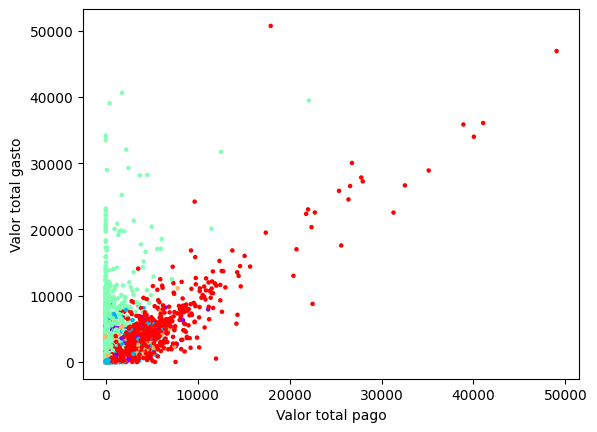

In [29]:
import matplotlib.pyplot as plt

plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show

### 07.05 Interpretação visual

/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning/Clustering_extraindo_padroes_de_dados/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


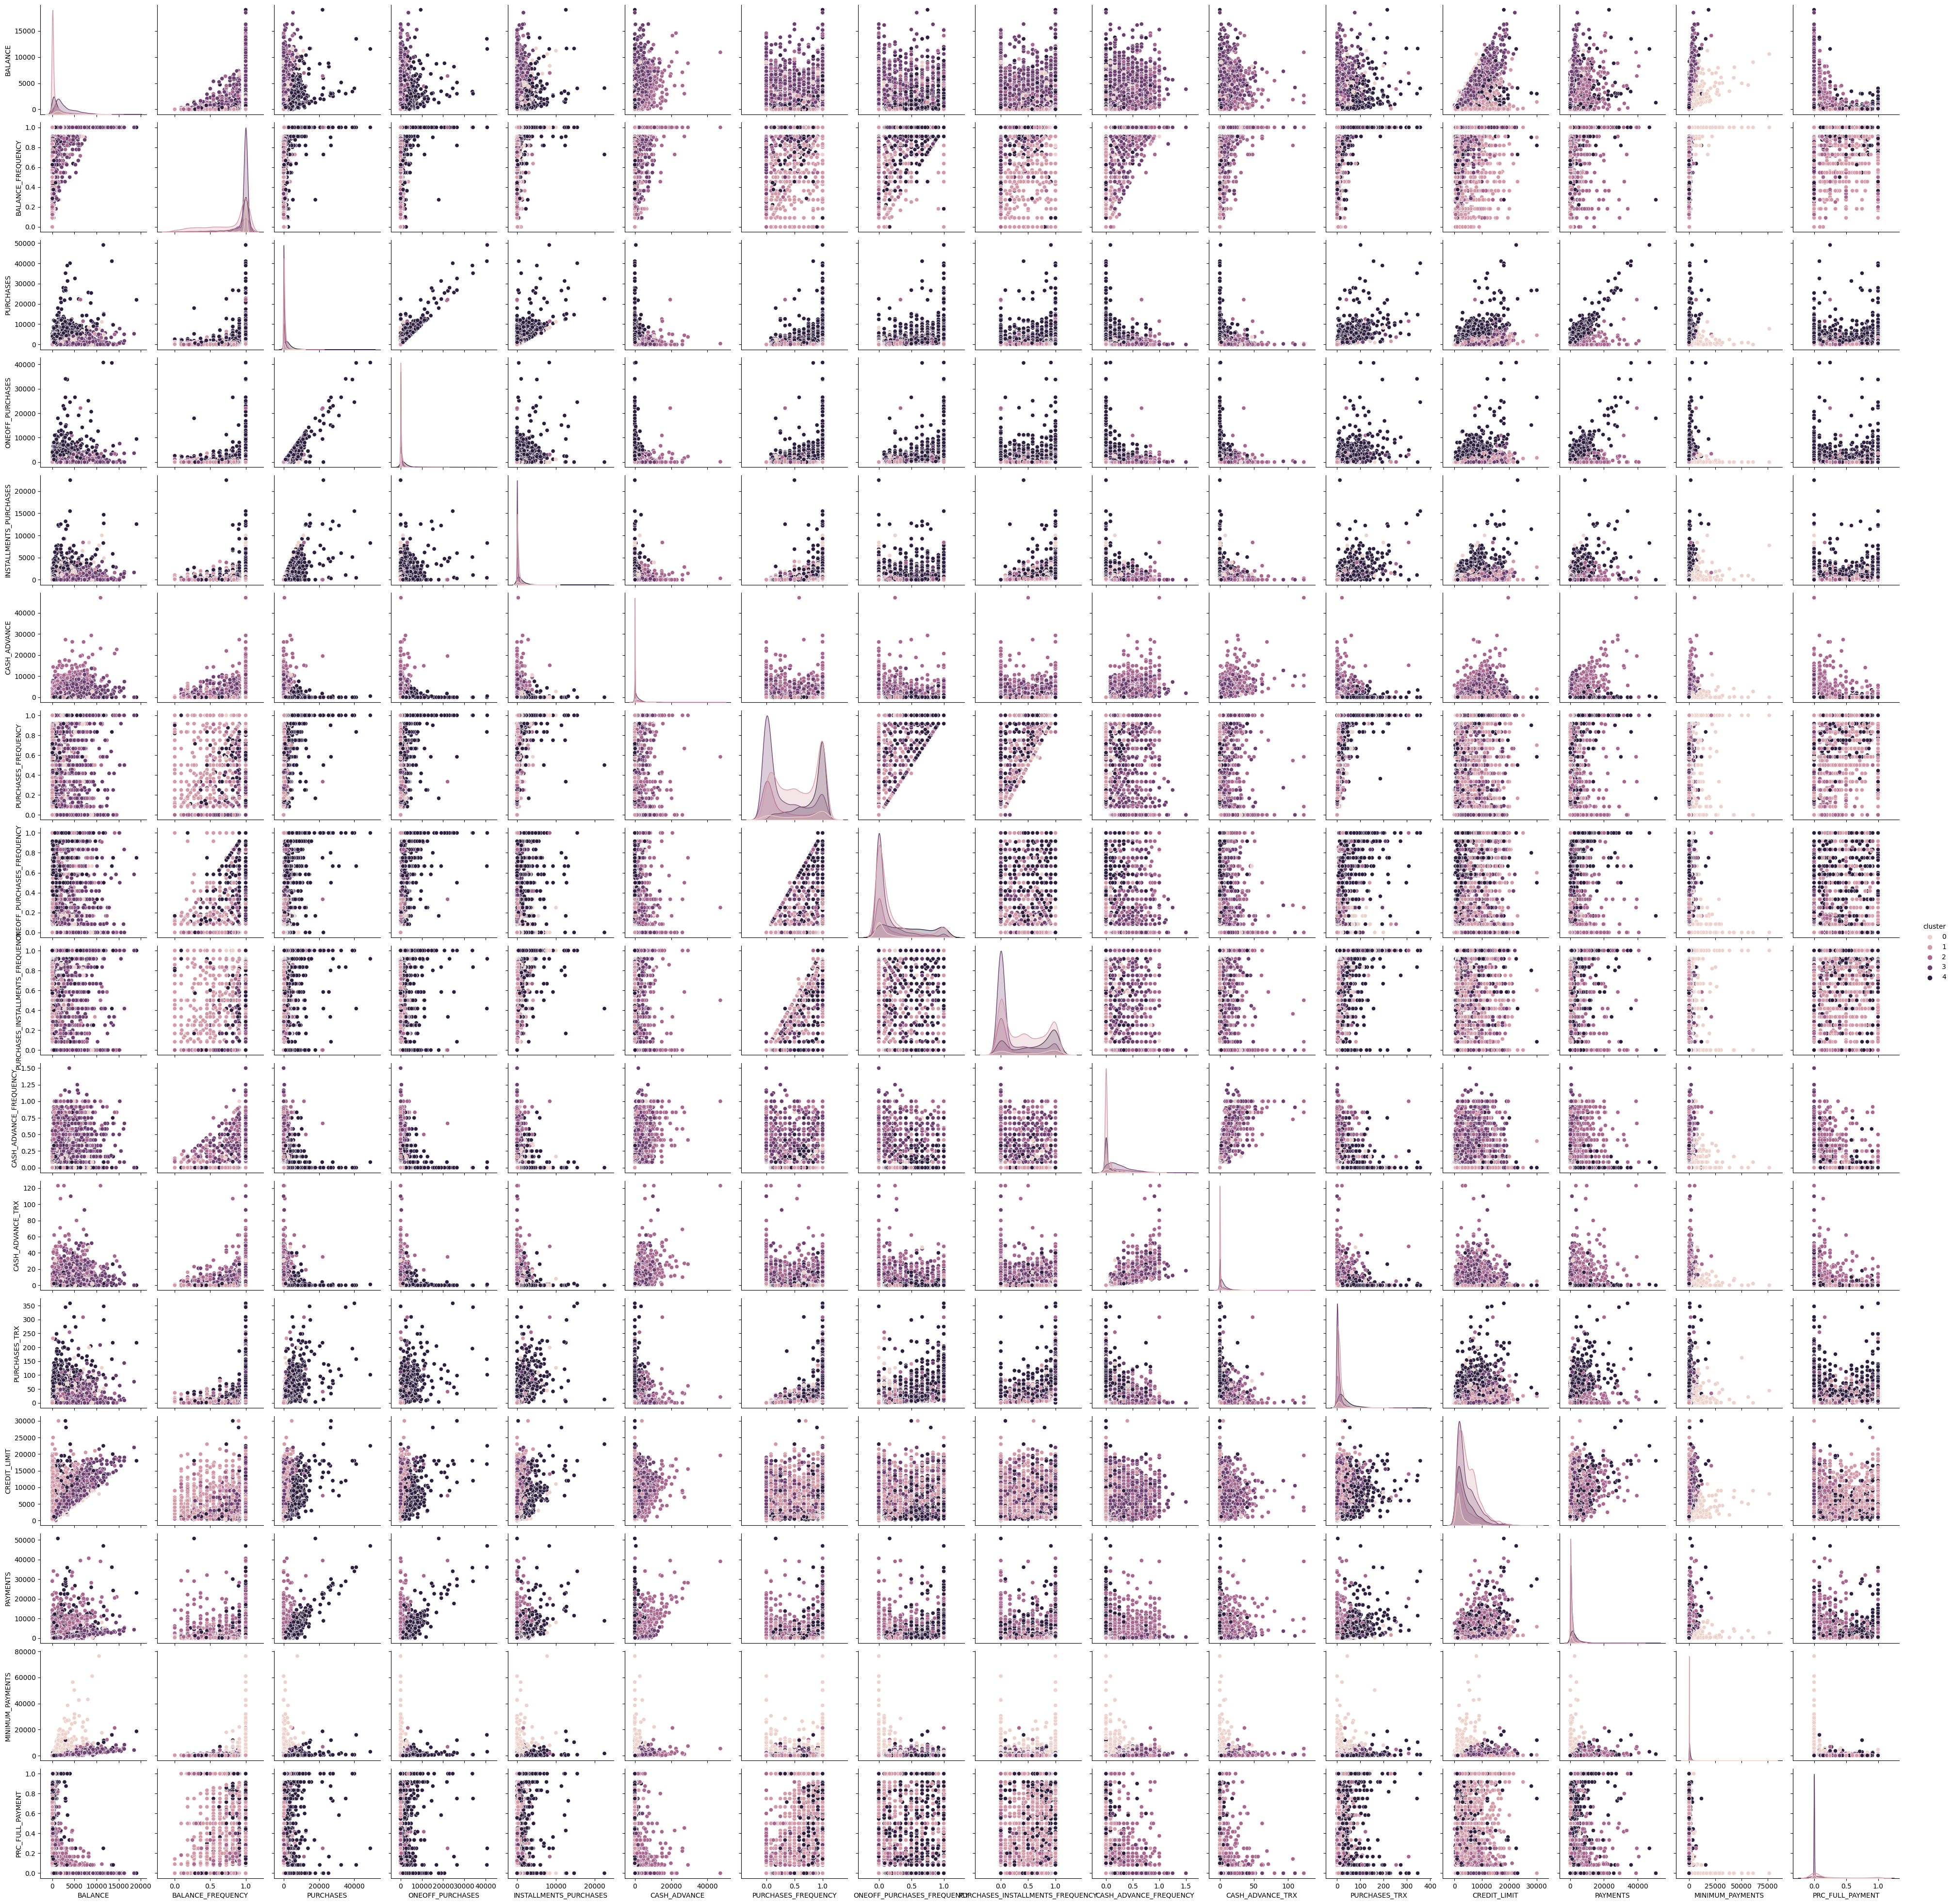

In [31]:
import seaborn as sns

dataframe['cluster'] = labels
sns.pairplot(dataframe[0:], hue="cluster")